In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/content/insurance.csv')


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Handling Null values

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-11-7452d86f8334>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

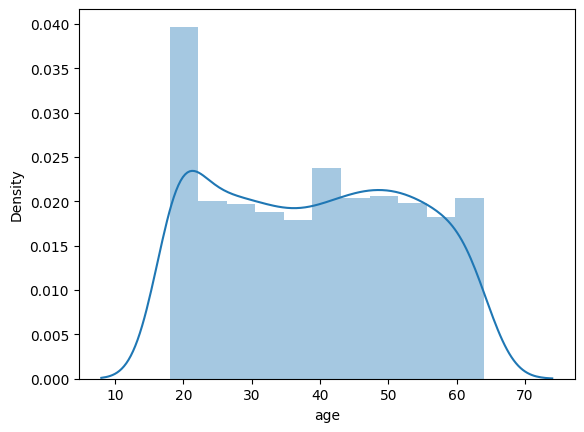

In [11]:
sns.distplot(df['age'])

<Axes: ylabel='age'>

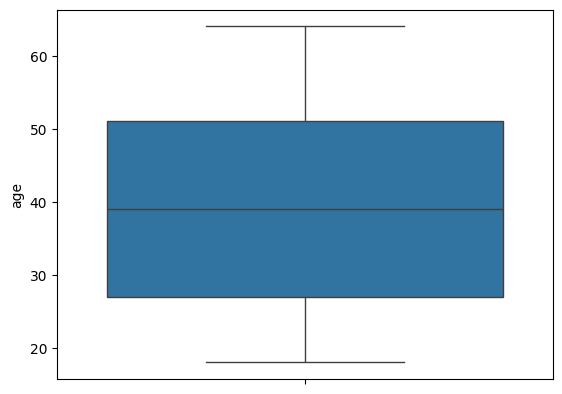

In [12]:
sns.boxplot(df['age'])

Detect Outlies of age column
1. Calculate first quartile(q1) and third quartile(q3)

In [14]:
q1 = df['age'].quantile(0.25)
q1

27.0

In [15]:
q3 = df['age'].quantile(0.75)
q3

51.0

In [16]:
IQR = q3-q1
IQR

24.0

Calculate Lower Bound q1 - 1.5IQR
Calculate Upper Bound q3 + 1.5IQR

In [21]:
lowerBound = q1-(1.5*IQR)
upperBound = q3+(1.5*IQR)
print(lowerBound)
print(upperBound)

-9.0
87.0


In [29]:
df['age']=np.where(df['age']>upperBound,upperBound,df['age'])

print(df[df['age']>upperBound])
print(df[df['age']<lowerBound])

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


Now there are no outliers in age column

Encoding data using LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520


Seperating data into input and ouput/target

In [103]:
x = df.drop(columns=['charges'], axis=1)
y = df['charges']
print(x)
print(y)


       age  sex     bmi  children  smoker  region
0     19.0    0  27.900         0       1       3
1     18.0    1  33.770         1       0       2
2     28.0    1  33.000         3       0       2
3     33.0    1  22.705         0       0       1
4     32.0    1  28.880         0       0       1
...    ...  ...     ...       ...     ...     ...
1333  50.0    1  30.970         3       0       1
1334  18.0    0  31.920         0       0       0
1335  18.0    0  36.850         0       0       2
1336  21.0    0  25.800         0       0       3
1337  61.0    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [104]:
X = Scaler.fit_transform(x)
X


array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [71]:
x = pd.DataFrame(X)

Splitting Data

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [106]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [107]:
pred = lr.predict(x_test)
pred

array([11051.54909755,  9821.28110689, 37867.57220923, 16125.70579228,
        6920.27132517,  3879.38549816,  1448.91928088, 14390.17797974,
        9022.95151353,  7458.83371884,  4584.60125463, 10309.9886336 ,
        8693.03891958,  4085.25393494, 27551.60737718, 11151.0640722 ,
       11243.0536825 ,  5962.9521121 ,  8181.9015666 , 26750.7993431 ,
       33448.59842228, 14350.03320383, 11672.89478465, 32235.7832204 ,
        4326.07702625,  9096.53607025,  1045.25196369, 10177.76672094,
        4042.60346751, 10384.28681219,  9035.98983755, 40123.71002379,
       15507.20819083, 13678.264976  , 24481.97362849,  5059.21988589,
       12889.80609711, 30333.92625689, 33301.25091403,  3431.35787088,
        3941.81614597,  4203.90901434, 30219.19050725, 39245.56885373,
       27762.83744249,  4994.74188765, 11042.48621304,  7760.15047885,
        3569.09734756, 10613.61535955,  5544.95921408,  3397.80923785,
       32701.67144343, 38285.57836702, 16290.50463759,  6965.99677468,
      